# luminoth Proyect with dipstick

See all info in readme of git in https://bitbucket.org/inkremental/luminoth/src/master/ 

## Confirm TensorFlow can see the GPU
Simply select "GPU" in the Accelerator drop-down in Notebook Settings (either through the Edit menu or the command palette at cmd/ctrl-shift-P).

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
# Conect Drive
from google.colab import drive
drive.mount('/content/drive/')
!rm -R jobs
!ln -s "/content/drive/My Drive/Inkremental_DOCS/69) SGS Conteo Barranquilla/2) Información/5) Investigación/app_luminoth_ssd/jobs" ./

Found GPU at: /device:GPU:0
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
rm: cannot remove 'jobs': No such file or directory


In [0]:
!ls "/content/drive/My Drive/Inkremental_DOCS/69) SGS Conteo Barranquilla/2) Información/5) Investigación/app_luminoth_ssd/jobs"

## Init Proyect
### Clone git of proyect
### Download dataset in git yolo3
### Prepare Dataset
### Conect Drive


In [13]:
from getpass import getpass
import os

user = getpass('BitBucket user')
password = getpass('BitBucket password')
os.environ['BITBUCKET_AUTH'] = user + ':' + password

# Clone git of proyect
!rm -r luminoth 
!git clone https://$BITBUCKET_AUTH@bitbucket.org/inkremental/luminoth.git
!cd luminoth && pip install -e .

# Download dataset in git dipstick
!rm -R dipstick 
!git clone https://$BITBUCKET_AUTH@bitbucket.org/inkremental/dipstick.git
  
# Prepare dataset
!rm -r dataset
!mkdir -p dataset
!cd dataset && ln -s ../dipstick/VOC_dipstick_1024/JPEGImages .
!cd dataset && ln -s ../dipstick/VOC_dipstick_1024/Annotations .
!mkdir -p dataset/ImageSets/
!cd dataset/ImageSets/ && ln -s ../../dipstick/VOC_dipstick_1024/ImageSets/Main .

# if package broke
!pip install -r luminoth/requeriments.txt

BitBucket user··········
BitBucket password··········
rm: cannot remove 'luminoth': No such file or directory
Cloning into 'luminoth'...
remote: Counting objects: 199, done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 199 (delta 15), reused 196 (delta 14)
Receiving objects: 100% (199/199), 1.97 MiB | 1.53 MiB/s, done.
Resolving deltas: 100% (15/15), done.
error: pathspec 'colab' did not match any file(s) known to git.
Obtaining file:///content/luminoth
    100% |████████████████████████████████| 2.3MB 10.3MB/s 
    100% |████████████████████████████████| 71kB 22.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/3f/f0/7c/1ec164f1dc11a6e0ef58463f5e25e83d9c6f661e2e8e70bcef
Successfully built easydict
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: Click 7.0
    Uninstalling Click-7.0:
      Successfully uninstalled Click-7.0
  Found existing installation: easydict 1.9
    Uninst

## TRAIN

## Transform VOC -> TensorFlow Data

In [18]:
!lumi dataset transform \
        --type pascal \
        --data-dir dataset/ \
        --output-dir datasets/pascal/tf \
        --split train --split valid --split all

(u'dataset/', u'dataset/ImageSets/Main', u'dataset/JPEGImages', u'dataset/Annotations', u'train')
INFO:tensorflow:Saving split "train" in output_dir = datasets/pascal/tf
  [------------------------------------]    0%('train_image10', u'dataset/JPEGImages/train_image10.jpg', u'dataset/Annotations/train_image10.xml')
('train_image11', u'dataset/JPEGImages/train_image11.jpg', u'dataset/Annotations/train_image11.xml')
('train_image12', u'dataset/JPEGImages/train_image12.jpg', u'dataset/Annotations/train_image12.xml')
  [------------------------------------]    1%('train_image13', u'dataset/JPEGImages/train_image13.jpg', u'dataset/Annotations/train_image13.xml')
  [#-----------------------------------]    2%('train_image14', u'dataset/JPEGImages/train_image14.jpg', u'dataset/Annotations/train_image14.xml')
  [#-----------------------------------]    4%('train_image15', u'dataset/JPEGImages/train_image15.jpg', u'dataset/Annotations/train_image15.xml')
  [##----------------------------------]

In [0]:
!ls dataset/ImageSets/Main


## RUN Train job

In [19]:
!time lumi train -c luminoth/examples/config_ssd_colab_20181109.yml \
    -o train.job_dir="jobs/" 



Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

INFO:tensorflow:Training 47 vars from pretrained module.
/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
INFO:tensorflow:Downloading truncated_vgg_16.ckpt checkpoint.
  [####################################]  100%             
INFO:tensorflow:Saving checkpoint to /root/.luminoth
INFO:tensorflow:Starting training for <luminoth.models.ssd.ssd.SSD object at 0x7f2680197a90>
Instructions for updating:
Use `tf.lo

KeyboardInterrupt: ignored

In [0]:
# Restore prev checkpoint
!cat jobs/train-dipstick-ssd-20181109/checkpoint
!echo 'model_checkpoint_path: "model.ckpt-169505"' > jobs/train-dipstick-ssd-20181109/checkpoint
!echo 'all_model_checkpoint_paths: "model.ckpt-169505"' >> jobs/train-dipstick-ssd-20181109/checkpoint
!cat jobs/train-dipstick-ssd-20181109/checkpoint


## Create model permament
This model use after to predict box on diferents sources


In [20]:
!cat jobs/train-dipstick-ssd-20181109/checkpoint

model_checkpoint_path: "model.ckpt-132"
all_model_checkpoint_paths: "model.ckpt-0"
all_model_checkpoint_paths: "model.ckpt-132"


In [21]:
# Create model
!lumi checkpoint -h
!lumi checkpoint create luminoth/examples/config_ssd_colab_20181109.yml \
-e name=ssd_colab_20181109_132 \
-e description="Modelo de reconocimiento de varillas ssd con ssd_colab_20181109_32883 pasos" \
-e alias=ssd_colab_20181109_132 
#!lumi -h
!lumi checkpoint list


Usage: lumi checkpoint [OPTIONS] COMMAND [ARGS]...

  Groups of commands to manage checkpoints

Options:
  -h, --help  Show this message and exit.

Commands:
  create    Create a checkpoint from a configuration...
  delete    Remove a checkpoint from the index and delete...
  download  Download a remote checkpoint.
  edit      Edit a checkpoint's metadata.
  export    Export a checkpoint to a tar file for easy...
  import    Import a checkpoint tar into the local index.
  info      Display detailed information on checkpoint.
  list      List available checkpoints.
  refresh   Refresh the remote checkpoint index.
Creating checkpoint for given configuration...
Checkpoint f9eb07c2523c created successfully.
|           id |                  name |       alias | source |         status |
| f9eb07c2523c | ssd_colab_20181109_132 | ssd_colab_20181109_132 |  local |          LOCAL |


In [0]:
!lumi checkpoint list

## Eval current checkpoint

In [23]:
!lumi eval -h && lumi eval -c luminoth/examples/config_ssd_colab_20181109.yml --max-detections 800 --split valid --split all  --watch --from-global-step 0



Usage: lumi eval [OPTIONS]

  Evaluate trained (or training) models

Options:
  --split TEXT                Dataset split to use.
  -c, --config TEXT           Config to use.  [required]
  --watch / --no-watch        Keep watching checkpoint directory for new
                              files.
  --from-global-step INTEGER  Consider only checkpoints after this global step
  -o, --override TEXT         Override model config params.
  --files-per-class INTEGER   How many files per class display in every epoch.
  --max-detections INTEGER    Max detections to consider.
  -h, --help                  Show this message and exit.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

INFO:tensorf

## Test: predict all images of folder

In [24]:
#!lumi predict -h
!rm -rf output/ ./train_result.json ./train_result.json.csv
!lumi predict \
--checkpoint f9eb07c2523c \
--max-detections 800 \
-f ./train_result.json \
-d ./output/ \
dataset/JPEGImages/ 


Found 310 files to predict.
2019-02-21 20:02:38.418164: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Predicting dataset/JPEGImages/train_201810_image64.jpg... done.
Predicting dataset/JPEGImages/train_201810_image103.jpg... done.
Predicting dataset/JPEGImages/image289.jpg... done.
Predicting dataset/JPEGImages/train_201810_image1.jpg... done.
Predicting dataset/JPEGImages/image41.jpg... done.
Predicting dataset/JPEGImages/train_image17.jpg... done.
Predicting dataset/JPEGImages/train_201810_image27.jpg... done.
Predicting dataset/JPEGImages/train_201810_image92.jpg... done.
Predicting dataset/JPEGImages/valid_task_image45.jpg... done.
Predicting dataset/JPEGImages/image29.jpg... done.
Predicting dataset/JPEGImages/train_201810_image6.jpg... done.
Predicting dataset/JPEGImages/train_image21.jpg... done.
Predicting dataset/JPEGImages/valid_task_image69.jpg... done.
Predicting dataset/JPEG

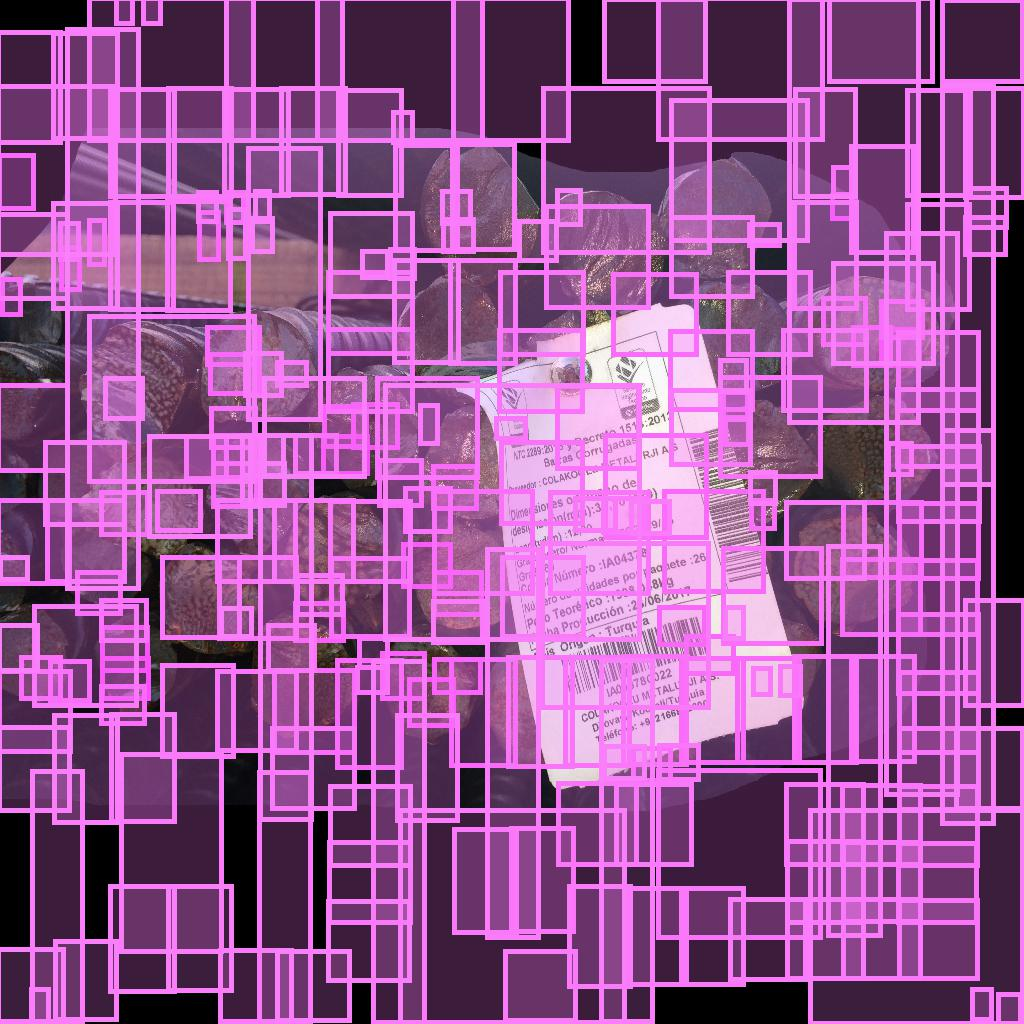

In [26]:

from IPython.display import Image
Image("/content/output/pred_image20.jpg")

### Copy results into drive

In [0]:
!mkdir -p jobs/train-dipstick-ssd-20181109/32883/
!cp output/* jobs/train-dipstick-ssd-20181109/32883/

## Copy models created

In [0]:
!apt-get install zip gzip tar
!zip -r  ./lumiConf.zip ~/.luminoth/ 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gzip is already the newest version (1.6-5ubuntu1).
tar is already the newest version (1.29b-2).
zip is already the newest version (3.0-11build1).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
  adding: root/.luminoth/ (stored 0%)
  adding: root/.luminoth/checkpoints/ (stored 0%)
  adding: root/.luminoth/checkpoints/checkpoints.json (deflated 40%)
  adding: root/.luminoth/checkpoints/636cd899052e/ (stored 0%)
  adding: root/.luminoth/checkpoints/636cd899052e/classes.json (stored 0%)
  adding: root/.luminoth/checkpoints/636cd899052e/model.ckpt-32370.meta (deflated 88%)
  adding: root/.luminoth/checkpoints/636cd899052e/checkpoint (deflated 56%)
  adding: root/.luminoth/checkpoints/636cd899052e/model.ckpt-32370.data-00000-of-00001 (deflated 7%)
  adding: root/.luminoth/checkpoints/636cd899052e/config.yml (deflated 55%)
  adding: root/.luminoth/checkpoints/636cd899052e/model.ckpt